#Info

<span>Work by Maximiliano Iturria</span>

v2
The DOS header (also called the MS-DOS header) is a 64-byte-long structure that exists at the start of a PE file12. It’s not important for the functionality of PE files on modern Windows systems, however it’s there because of backward compatibility reasons12. This header makes the file an MS-DOS executable, so when it’s loaded on MS-DOS the DOS stub gets executed instead of the actual program2. Without this header, if you attempt to load the executable on MS-DOS it will not be loaded and will just produce a generic error2.

It’s useful to know about the DOS header if you’re working with PE files or if you’re interested in understanding how executable files work on Windows systems. Is there anything else you’d like to know?

<pre>Content

The Dataset contains features extracted from malicious and non-malicious windows executable files.
I have created this training file using hybrid features (binary hexadecimal + DLL calls) from windows executables.
The file consist of total 373 samples of which 301 are malicious files while rest 72 are non-malicious.
The dataset is imbalanced with malware samples more than regular samples.
There are 531 features represented from F_1 all way to F_531 and a label column stating if the file is malicious or non-malicious.
As representing binary hexadecimal feature names was difficult they have been represented as F_1, F_2,.. and so on, the same applies to DLL calls which are included in it. Some features out of 531 feature can be dropped as they hold very little importance, more to be explored as part of feature engineering.
Column label would hold true value of the executable file if it was a malware or not.
Acknowledgements

The <a href='http://kaggle.com/datasets/piyushrumao/malware-executable-detection'>dataset</a> was been created based on following paper:
Using Two Dimensional Hybrid Feature Dataset to Detect Malicious Executables

Also can be found on UCI here:
UCI Dataset on Malicious Executable Detection
Inspiration

Find out if downloaded executable is a malware, even before installing it which would minimize the harm caused by it to your system or personal files.
I found very few datasets on malware analysis techniques which is the need of our hour, there is more work to be added in the one above for detecting zero day attacks. So I hope you encourage this work.</pre>

In [1]:
from zipfile import ZipFile as zf

SEED = 1

with zf('set.zip','r') as zin:
    zin.extractall()

In [2]:
import pandas as pd

df = pd.concat(map(pd.read_csv, ['dataset_malwares.csv', 'dataset_test.csv']))

Checking for NaN

In [3]:
df[df.columns[df.isnull().any()]].isnull().sum()

Malware    17
dtype: int64

In [10]:
df[df['Malware'].isnull()].head()

,Name,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,...,SectionMaxChar,SectionMainChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity
0,Skype-8.10.0.9.exe,23117,80,2,0,4,15,65535,0,184,...,3221225536,0,11,122,0,0,102400,114688,0,53905336
1,vlc-3.0.2-win64.exe,23117,144,3,0,4,0,65535,0,184,...,3227517056,0,7,165,0,0,208896,430080,0,40201272
2,stinger32.exe,23117,64,1,0,2,0,65535,0,184,...,3758096608,0,1,2,7,36339712,36339976,36343808,0,16478208
3,SpotifyFullSetup.exe,23117,144,3,0,4,0,65535,0,184,...,3221225536,0,8,159,0,0,634448,679936,0,63220064
4,uftp_english.exe,23117,144,3,0,4,0,65535,0,184,...,3221225536,0,4,92,0,0,38620,49152,0,35544576


In [12]:
df = df.fillna(0)
df = df.set_index(['Name'])

A bit of Data Science (and visualization) before ML

In [16]:
df['Malware'] = df['Malware'].map({1:'Malignant',0:'Benign'})

In [17]:
df.groupby(['Malware']).count().transpose().head()

Malware,Benign,Malignant
e_magic,5029,14599
e_cblp,5029,14599
e_cp,5029,14599
e_crlc,5029,14599
e_cparhdr,5029,14599


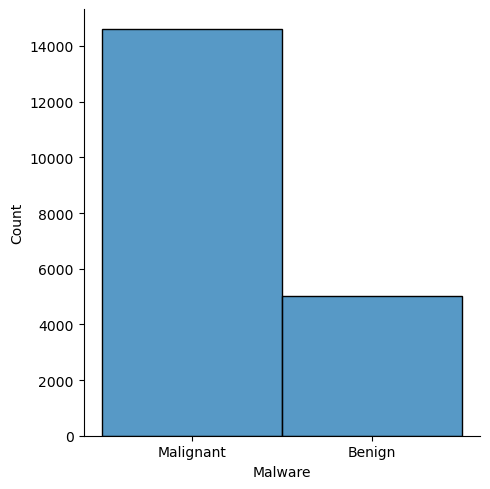

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.displot(df['Malware'])

<p>As seen in the previous graph, we are dealing with imbalanced data.</p>

In [30]:
from sklearn.model_selection import train_test_split

# Set our axes
X = df.drop('Malware',axis=1)
y = df['Malware']

Preprocessing

<ul>
<li>We need to do normalization since our values are represented in different scales</li>
</ul>

In [35]:
from sklearn.preprocessing import MinMaxScaler

X = MinMaxScaler().fit_transform(X)

In [36]:
# Splitting the data
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=SEED,shuffle=True,test_size=0.1,stratify=y)
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,random_state=SEED,shuffle=True,test_size=0.1,stratify=y_train)

len(X_train),len(X_val),len(X_test)

(15898, 1767, 1963)

In [43]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_val)
clf.score(X_val,y_val)

0.9722693831352575

In [46]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(random_state=SEED,solver='lbfgs',max_iter=10,hidden_layer_sizes=9)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_val)
clf.score(X_val,y_val)

c:\Users\W\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.9349179400113187